# Yapay Sinir Ağları ile Rakam Tanıma

### İş Problemi

El yazısı ile yazılan rakamları tanıma

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [5]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [7]:
num_labels = len(np.unique(y_train))

In [8]:
num_labels

10

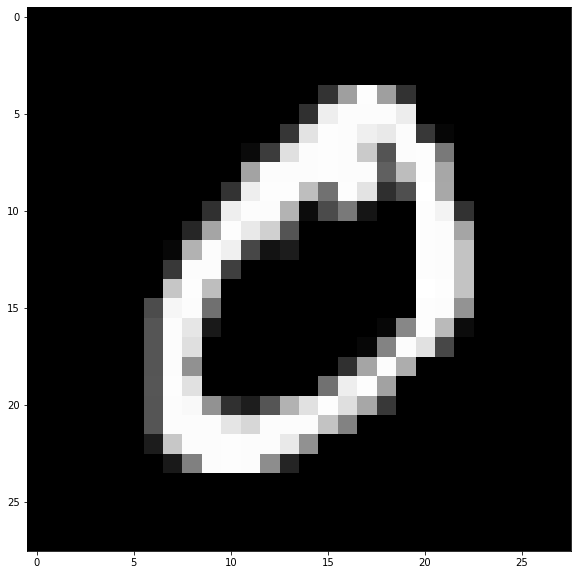

In [12]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[1], cmap = "gray");

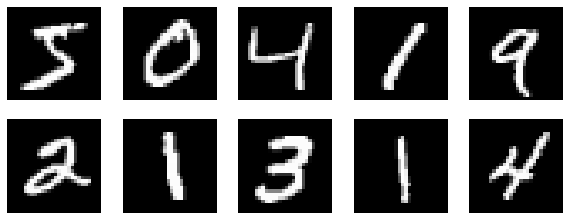

In [13]:
plt.figure(figsize = (10,10))
for n in range(10) :
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap = "gray")
    plt.axis("off")

In [15]:
def visualize_img(data):
    plt.figure(figsize = (10,10))
    for n in range(10) :
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n],cmap = "gray")
        plt.axis("off")

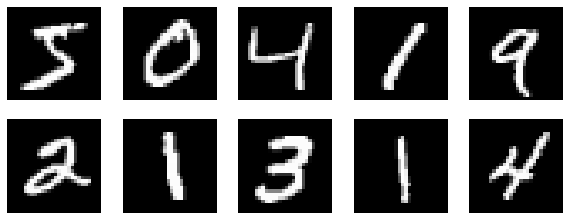

In [16]:
visualize_img(x_train)